# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import normaltest, zscore

df = pd.read_csv('data/human_body_temperature.csv')

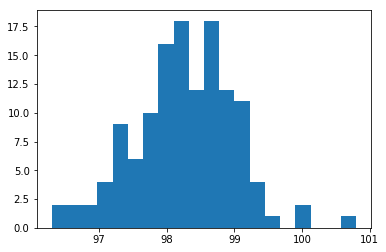

The p-value is 0.2587479863488254.


In [2]:
# 1. Is the distribution of body temperatures normal?

# Visual check.

graph = plt.hist(df['temperature'], bins=20)

plt.show()

# Appears normal from the graph. Use a test with 95% confidence.

stats, p = normaltest(df['temperature'])

print(f'The p-value is {p}.')

# The p-value is significantly larger than 0.05. We should keep the null hypothesis and assume the distribution is normal.

In [3]:
# 2. Is the sample size large? Are the observations independent?

print(df['temperature'].count())

# The sample size is 130. Typically, the Central Limit Theorem requires samples of size 30 or larger.
# So yes, the sample size is large.

# Independence is a safe assumption for simple random samples of size less than 10 percent of the population.
# So yes, the observations are independent.

print(np.mean(df['temperature']), np.std(df['temperature']))

130
98.24923076923078 0.7303577789050377


In [4]:
# 3. Is the true population mean really 98.6 degrees F?

# First, try a bootstrap hypothesis test.

def draw_bs_reps(data, func, size=1):

    # Initialize array of replicates: bs_replicates
    bs_replicates = [0] * size

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))

    return bs_replicates

null_temp = 98.6

bootstrap_temp = draw_bs_reps(df['temperature'], np.mean, size=10000)

confidence_interval_temp = np.percentile(bootstrap_temp, [2.5, 97.5])

print(f'95% confidence interval for the population mean:', confidence_interval_temp)

if null_temp > confidence_interval_temp[0] and \
   null_temp < confidence_interval_temp[1]:
    print(f'{null_temp} falls within the 95% confidence interval of our bootstrap.')
else:
    print(f'{null_temp} does not fall within the 95% confidence interval of our bootstrap.')
    
# Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
# In this situation, is it appropriate to use the  tt  or  zz  statistic?

'''
I would use a one-sample test and a z-statistic because we do not have two means to compare.
We are interested in a single population parameter based on a single sample parameter.
We are not comparing treatment-vs-control or before-and-after.
Our sample size is large, so the difference between the z-test and t-test is minimal.
'''

z_null_temp = (np.mean(df['temperature']) - 98.6) / (np.std(df['temperature']) / np.sqrt(df['temperature'].count()))

print(f'A temperature of 98.6 has a z-score of', round(z_null_temp, 2), '.')

if z_null_temp > -1.96 and z_null_temp < 1.96:
    print(f'98.6 is within the confidence interval of the z-test for significance.')
else:
    print(f'98.6 is outside the confidence interval of the z-test for significance.')
    
# Now try using the other test.

t_null_temp = (np.mean(df['temperature']) - 98.6) / (np.std(df['temperature']) / np.sqrt(df['temperature'].count()))

print(f'A temperature of 98.6 has a t-score of', round(t_null_temp, 2), '.')

if t_null_temp > -1.9785 and t_null_temp < 1.9785:
    print(f'98.6 is within the confidence interval of the t-test for significance.')
else:
    print(f'98.6 is outside the confidence interval of the t-test for significance.')
    
# How is the result different? Why?

# For large n, there is essentially no difference between the z-test and the t-test.

95% confidence interval for the population mean: [98.12153846 98.37538462]
98.6 does not fall within the 95% confidence interval of our bootstrap.
A temperature of 98.6 has a z-score of -5.48 .
98.6 is outside the confidence interval of the z-test for significance.
A temperature of 98.6 has a t-score of -5.48 .
98.6 is outside the confidence interval of the t-test for significance.


In [5]:
# 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

sample = np.random.choice(df['temperature'], size=10)

print(sample)

z_null_temp10 = (np.mean(sample) - 98.6) / (np.std(sample) / np.sqrt(10))

print(f'A temperature of 98.6 has a z-score of', round(z_null_temp10, 2), '.')

if z_null_temp10 > -1.96 and z_null_temp10 < 1.96:
    print(f'98.6 is within the confidence interval of the z-test for significance.')
else:
    print(f'98.6 is outside the confidence interval of the z-test for significance.')
    
# Now try using the other test.

t_null_temp10 = (np.mean(sample) - 98.6) / (np.std(sample) / np.sqrt(10))

print(f'A temperature of 98.6 has a t-score of', round(t_null_temp10, 2), '.')

if t_null_temp10 > -2.2622 and t_null_temp10 < 2.2622:
    print(f'98.6 is within the confidence interval of the t-test for significance.')
else:
    print(f'98.6 is outside the confidence interval of the t-test for significance.')

# Which one is the correct one to use?

# The correct test to use is now the t-test, because it gives better approximations for smaller samples.

# What do you notice? What does this tell you about the difference in application of the  tt  and  zz  statistic?

# In most cases for this data set, the z-test and t-test yield the same result.
# This tells me the subtle difference is not worth worrying about.
# It appears the t-test approaches the z-test for large values of n.
# It would be best to use the t-test in all cases, to avoid the problem with
# small sample sizes without losing anything substantial for large ones.

[97.1 97.8 97.9 98.2 98.  98.6 97.9 99.  98.7 98.8]
A temperature of 98.6 has a z-score of -2.31 .
98.6 is outside the confidence interval of the z-test for significance.
A temperature of 98.6 has a t-score of -2.31 .
98.6 is outside the confidence interval of the t-test for significance.


In [6]:
# 5. At what temperature should we consider someone's temperature to be "abnormal"?

# Let's consider any temperature outside the margin of error 'abnormal'.
# Let's continue with 95% confidence for setting the margin of error.
# 95% confidence is attained at the mean +/- 1.96 standard deviations.

# Bootstrap Method

def abnormal_calc(data):
    
    lower = np.mean(data) - np.std(data) * 1.96
    
    upper = np.mean(data) + np.std(data) * 1.96
    
    return [lower, upper]

# We are getting a bootstrap list of lower boundaries and upper boundaries.

bootstrap_ab = draw_bs_reps(df['temperature'], abnormal_calc, size=10000)

# Separate the lower and upper bounds into their own lists.

lower_bound, upper_bound = [a for a, b in bootstrap_ab], [b for a, b in bootstrap_ab]

# Determine a confidence interval for each. Using a left-tail for the lower bound
# and a right-tail for the upper, because the extreme values only occur on one side
# for each of these calculations.

lower_bound_conf = np.percentile(lower_bound, [5, 100])

upper_bound_conf = np.percentile(upper_bound, [0, 95])

# Frequentist Method: Determine the margin of error based on a z-test.
# The margin of error is the mean +/- 1.96 standard errors,
# and the standard error is stdev / sqrt(number of data points)

standard_error = np.std(df['temperature']) / np.sqrt(df['temperature'].count())

lower_margin = np.mean(df['temperature']) - (1.96 * standard_error)
                                                   
upper_margin = np.mean(df['temperature']) + (1.96 * standard_error)

bounds = [lower_margin, upper_margin]

print(f'The experiment gave us these bounds:', bounds)

print(f'The confidence interval for the lower bound is:', lower_bound_conf)

print(f'The confidence interval for the upper bound is:', upper_bound_conf)

# The empirical bounds fit within our bootstrapped confidence interval, so we'll use them.

print(f'Any temperature lower than {bounds[0]} or higher than {bounds[1]} is abnormal.')

The experiment gave us these bounds: [98.12367980442819, 98.37478173403336]
The confidence interval for the lower bound is: [96.6209121  97.25685552]
The confidence interval for the upper bound is: [99.2882852  99.87494823]
Any temperature lower than 98.12367980442819 or higher than 98.37478173403336 is abnormal.


In [3]:
# Is there a significant difference between males and females in normal temperature?

gender_difference = np.mean(df[df['gender'] == 'M']['temperature']) - np.mean(df[df['gender'] == 'F']['temperature'])

def draw_perm_reps(data_1, data_2, func, size=1):
    
    # Initialize an empty array of replicates
    perm_replicates = np.empty(size)
    
    data = np.concatenate((data_1, data_2))
    
    for i in range(size):
        
        # Scramble the data
        data = np.random.permutation(data)
        
        # Generate a permuation
        perm_1, perm_2 = data[:len(data_1)], data[len(data_1):]
        
        # Compute the test statistic
        perm_replicates[i] = func(perm_1, perm_2)
        
    return perm_replicates

def diff_of_means(data_1, data_2):
    
    return np.mean(data_1) - np.mean(data_2)

m = df[df['gender'] == 'M']
f = df[df['gender'] == 'F']

gender_perm_test = draw_perm_reps(m.temperature, f.temperature, diff_of_means, 10000)

p = np.sum(gender_perm_test >= gender_difference) / len(gender_perm_test)

print(f'The empirical difference between male and female temperature is:', gender_difference)

print(f'The p-value is:', p)

# This p-value is well above our significance limit of .05; we fail to reject the null hypothesis.
# The empirically observed difference is quite likely to have resulted from random chance.

# What testing approach did you use and why?

# I used a permutation test to determine how likely the observed difference in means was to be random chance.

The empirical difference between male and female temperature is: -0.289230769230727
The p-value is: 0.9879
The null hypothesis—the difference equaling zero—is well within our confidence interval, as is our observed result.


Write a story with your conclusion in the context of the original problem.

We sought to determine whether there was a statistically significant difference between the normal temperatures of males and females. We began by assuming there is actually no difference. We sorted the data into two groups, male and female, and taking the difference between the means of each group. If there were no difference in body temperature, we would expect the difference of the means to be reasonably close to zero, and it was. From there, we wanted to create a confidence interval giving some insight into how widely the difference in means could have varied. So we began with this premise: if gender has absolutely no effect on body temperature, then sorting the data into piles by gender should be just the same as if we had sorted the data into two piles completely randomly. So we did this random process 10,000 times, found the means of the piles, and took the difference of those means. Doing this gave us 10,000 simulations of the difference in means of genders, *assuming gender has no effect on temperature.* Then we checked our empirical observation to see if it was very different from our simulations. The observed difference, in fact, falls very close to the middle of our confidence interval. So we have no reason to reject the null hypothesis. We should continue believing there is no difference between body temperature for males and females.